In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import torch
np.random.seed(0)
torch.manual_seed(0)

OpenBLAS blas_thread_init: pthread_create failed for thread 45 of 64: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 46 of 64: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 47 of 64: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 48 of 64: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 49 of 64: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
OpenBLAS blas_thread_init: pthread_create failed for thread 50 of 64: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 1024 current, 1024 max
Open

KeyboardInterrupt: 

In [ ]:
def set_all_seeds(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Create Simple DataSet

## Generation PV

In [17]:
def get_generation_PV():
    # Generation
    x = np.linspace(0, 23, 24)

    # Create generation curve with randomness
    y_perf = np.sin((x/4) + 5)
    y_gen = y_perf + np.random.normal(0, 0.1, 24)
    # Clip to 0
    y_perf = y_perf.clip(0)
    y_gen = y_gen.clip(0)
    # Adjust
    y_gen = y_gen * 1500
    y_perf = y_perf *1500

    return y_gen, y_perf, x

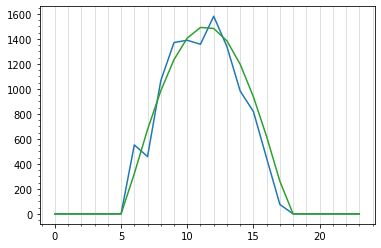

In [18]:
# Generation
y_gen, y_perf, x, = get_generation_PV()

# Plotting
plt.plot(x, y_gen)
plt.plot(x, y_perf, 'tab:green')
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)

## Demand 

### Demand 1 - Family

In [20]:
def get_demand_h1(temp):
    y_base = np.array([60 for i in range(24)])
    usage = np.array([0,0,0,0,0,300,1000,1200,300,0,0,0,0,0,0,400,500,500,800,1000,800,300,100,0])
    y_demand_1 = y_base + usage +((np.abs(temp - 22)) * 50 ) + np.random.normal(0, 60, 24)
    return y_demand_1, usage

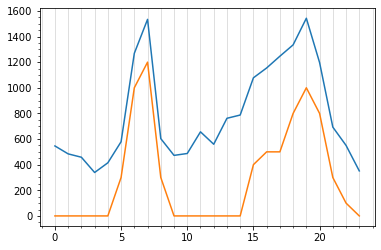

In [21]:
# Consider temperature
x = np.linspace(0, 23, 24)

# Add Noise and temperature offset
temp = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29])
y_demand_1, usage = get_demand_h1(temp)

# Plotting
plt.plot(x, y_demand_1)
plt.plot(x, usage)
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)

### Demand 2 - Teenagers

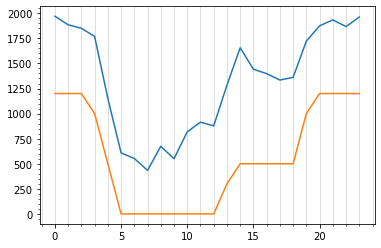

In [22]:
# Consider temperature
x = np.linspace(0, 23, 24)

y_base = np.array([300 for i in range(24)])
usage = np.array([1200,1200,1200,1000,500,0,0,0,0,0,0,0,0,300,500,500,500,500,500,1000,1200,1200,1200,1200])

# Add Noise and temperature offset
temp = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29])
y_demand_2 = y_base + usage +((temp - 22) * 50 ) + np.random.normal(0, 60, 24)

# Plotting
plt.plot(x, y_demand_2)
plt.plot(x, usage)
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)

### Demand 3 - House Business

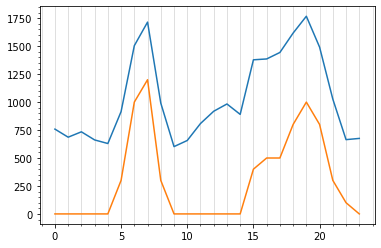

In [23]:
# Consider temperature
x = np.linspace(0, 23, 24)

y_base = np.array([300 for i in range(24)])
usage = np.array([0,0,0,0,0,300,1000,1200,300,0,0,0,0,0,0,400,500,500,800,1000,800,300,100,0])

# Add Noise and temperature offset
temp = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29])
y_demand_3 = y_base + usage +((temp - 22) * 50 ) + np.random.normal(0, 60, 24)

# Plotting
plt.plot(x, y_demand_3)
plt.plot(x, usage)
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)

## Grid Electricity Price and C02

In [24]:
def get_grid_prices_day():
    # The grid has only 1 nuclear and 1 gas stations
    # Nuclear Power is a baseline and always generates the same amount of energy
    y_nuclear = np.array([1000 for i in range(24)])
    # Gas Power is variable and has a higher cost in terms of co2 and price
    y_gas = np.array([0,0,0,0,0,0,300,600,1000,600,300,300,300,300,600,1000,600,300,0,0,0,0,0,0])

    y_elec = y_nuclear + y_gas
    y_elec_price = y_nuclear * 0.10 + y_gas * 0.30
    y_elec_carbon = y_nuclear * 0.01 + y_gas * 0.2
    return y_elec, y_elec_price, y_elec_carbon, y_nuclear, y_gas

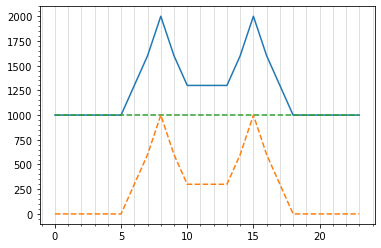

In [25]:
x = np.linspace(0, 23, 24)

y_elec, y_elec_price, y_elec_carbon, y_nuclear, y_gas = get_grid_prices_day()

# Plotting
plt.plot(x, y_elec)
plt.plot(x, y_nuclear,'tab:green' ,linestyle='dashed')
plt.plot(x, y_gas,'tab:orange', linestyle='dashed' )
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)


## Total Plots

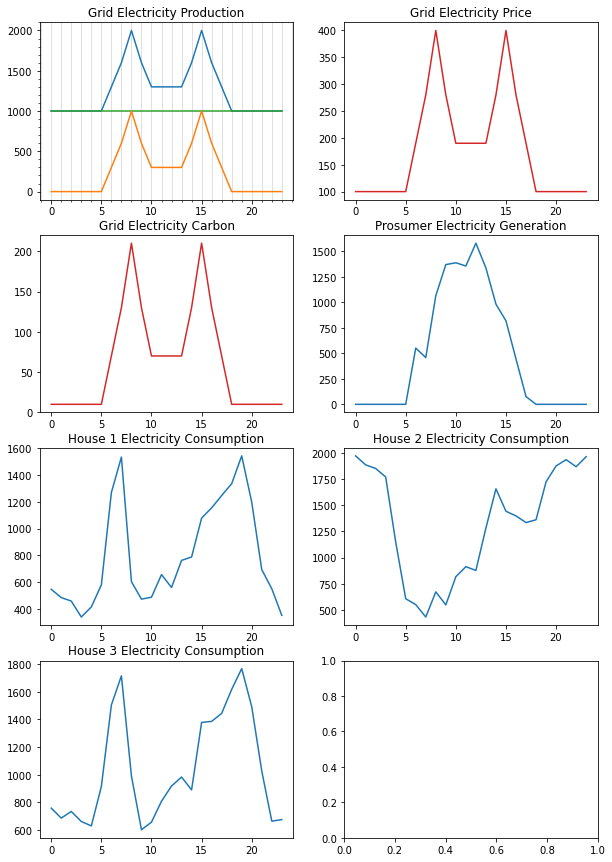

In [26]:

fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2)
fig.set_size_inches(10, 15)

# Plotting
ax1.set_title('Grid Electricity Production');
ax1.plot(x, y_elec, 'tab:blue')
ax1.plot(x, y_nuclear, 'tab:green')
ax1.plot(x, y_gas, 'tab:orange')
# Small Grid
ax1.minorticks_on()
ax1.grid(True, which='both', axis='x', alpha=0.5)

ax2.plot(x, y_elec_price, 'tab:red')
ax2.set_title('Grid Electricity Price');

ax3.plot(x, y_elec_carbon, 'tab:red')
ax3.set_title('Grid Electricity Carbon');

# Generation House 1
ax4.plot(x, y_gen)
ax4.set_title('Prosumer Electricity Generation');

# Demand House 1
ax5.plot(x, y_demand_1)
ax5.set_title('House 1 Electricity Consumption');

# Demand House 2
ax6.plot(x, y_demand_2)
ax6.set_title('House 2 Electricity Consumption');

# Demand House 3
ax7.plot(x, y_demand_3)
ax7.set_title('House 3 Electricity Consumption');

# Environment

In [27]:
TIME = 24 # 24 hours
NUM_OBS = 7

state = np.zeros((NUM_OBS, TIME)) 
state[0] = np.linspace(0, 23, 24) # hours
state[1] = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29]) # temperature
state[2] = get_generation_PV()[0] # generation
state[3] = get_demand_h1(state[1])[0] # demand
state[4] = get_grid_prices_day()[1] # grid energy price
state[5] = get_grid_prices_day()[2] # grid energy carbon
# State[6] starts in 0 -  SOC battery of house 1
state[6] = 1
state[:,0]

array([  0.        ,  31.        ,   0.        , 439.06514275,
       100.        ,  10.        ,   1.        ])

In [30]:
TIME = 24 # 24 hours
NUM_OBS = 7

# No batches
class HouseEnergy:
  def __init__(self):
    self.time = 0
    self.state = np.zeros((NUM_OBS, TIME)) 
    self.state[0] = np.linspace(0, 23, 24) # hours
    self.state[1] = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29]) # temperature
    self.state[2] = get_generation_PV()[0] # generation
    self.state[3] = get_demand_h1(self.state[1])[0] # demand
    self.state[4] = get_grid_prices_day()[1] # grid energy price
    self.state[5] = get_grid_prices_day()[2] # grid energy carbon
    # State[6] starts in 0 -  SOC battery of house 1

    self.rewards= [i for i in range(24)]
  
  #TODO 
  def reward(self, state):
    return 0

# Reset
  def reset(self):
    self.state[6] = 0 # SOC battery of house 1 , restart
    self.time = 0

# Step
  def step(self, action): # action are prices for buying and selling own electricity
    self.time +=1
    curr_state = state[:,0]
    reward = self.reward(curr_state)

    # Return state, reward, done
    return curr_state, reward , self.time < TIME

In [31]:
# Loop to run environment
env = HouseEnergy()
# env.reset()
a = 0
state, reward, done = env.step(a)

In [ ]:
def rollout(actor, env):
    env.reset()
    done = False
    log_probs, rewards = [],[]

    while not done:
        action = actor.predict(state)
        

        state, reward, done = env.step(action)

        rewards.append(reward)
        log_probs.append(log_ prob)
    return log_probs, rewards

In [ ]:
log_probs, rewards = rollout(actor, env)

In [ ]:
env = HouseEnergy()
